In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import pickle 
sns.set()
#from var_model.gobnilp_utils import shift_cols

In [3]:
from var_model.model_train import train_predict_save

## Train Models
Airquality and PRSA dataset for all variants of normalization including no normalization

In [4]:
normalizations = ["","std","minmax"]

### Train + Predict Airquality

In [5]:
df_airquality_train = pd.read_csv("../data/03_model_input/air_quality_train.csv")

In [6]:
df_airquality_test = pd.read_csv("../data/03_model_input/air_quality_test.csv")

In [7]:
for normalization in normalizations:
    train_predict_save(df_airquality_train,df_airquality_test,"../data/04_model_bn_output/","../data/05_model_output/","airquality",normalization,p =1)

### Train + Predict PRSA

In [8]:
df_prsa_train = pd.read_csv("../data/03_model_input/prsa_train.csv")

In [9]:
df_prsa_test = pd.read_csv("../data/03_model_input/prsa_test.csv")

In [10]:
for normalization in normalizations:
    train_predict_save(df_prsa_train,df_prsa_test,"../data/04_model_bn_output/","../data/05_model_output/","prsa",normalization,p =1)

# 1. Load Mask and data

In [2]:
with open(r"../data/04_model_bn_output/airquality_bn_matrix.pkl", "rb") as input_file:
    airquality_mask = pickle.load(input_file)

In [3]:
airquality_mask = airquality_mask + np.eye(13)

In [4]:
airquality_mask

matrix([[1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.],
        [1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1.],
        [1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.],
        [0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]])

In [5]:
df_airquality_train = pd.read_csv("../data/03_model_input/air_quality_train.csv")

In [6]:
df_airquality_test = pd.read_csv("../data/03_model_input/air_quality_test.csv")

In [7]:
df_airquality_test.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     0.7        833.0     275.0       2.0          584.0    107.0   
1     1.1        877.0     275.0       2.8          642.0    176.0   
2     1.1        892.0     275.0       3.3          668.0    180.0   
3     1.2        899.0     275.0       3.4          674.0    212.0   
4     2.0       1008.0     275.0       7.1          861.0    331.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1144.0     80.0         821.0        463.0  11.3  32.5  0.4334  
1        1037.0    112.0         859.0        565.0  11.0  33.0  0.4331  
2        1017.0    121.0         872.0        632.0  10.3  35.0  0.4377  
3        1002.0    132.0         893.0        691.0   8.4  40.9  0.4542  
4         839.0    160.0         977.0        943.0   8.3  38.5  0.4228

In [8]:
np.squeeze(np.asarray(airquality_mask[-3, :]) > 0)

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False])

# 2. Train Var Model

In [9]:
from var_model.var_bn import VAR_bn

In [10]:
var_air_w_mask = VAR_bn(df_airquality_train,1,airquality_mask)
var_air_w_mask.train_model_per_col()

In [11]:
var_air_wo_mask = VAR_bn(df_airquality_train,1)
var_air_wo_mask.train_model_per_col()

## calculate coefficient matrices

In [122]:
def coeff_matrix_no_mask(var_model):
    models = []

    for model in var_model.models:
        models.append(var_model.models[model].params)
    
    return np.stack(models)

In [155]:
coeff_matrix_no_mask = coeff_matrix_no_mask(var_air_wo_mask)

<AxesSubplot: >

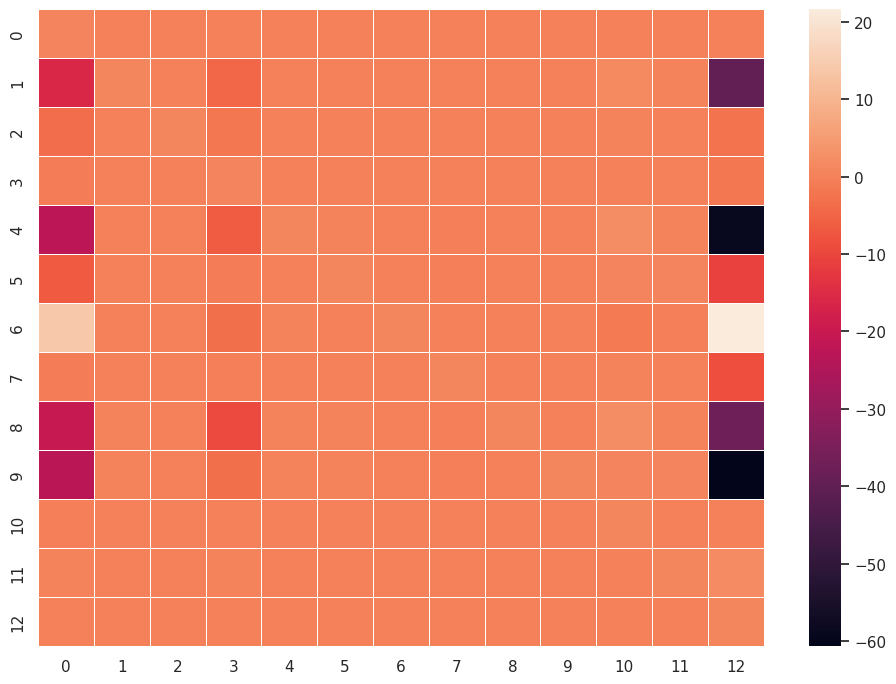

In [163]:
sns.heatmap(coeff_matrix_no_mask, linewidth = 0.5)

In [153]:
def calculate_matrix_mask(var_model, mask):
    values = []
    for model, coeff_mask in zip(var_model.models,mask):
        i = 0
        params = var_model.models[model].params
        coeff_mask = np.array(coeff_mask[0])[0]
        for j,item in enumerate(coeff_mask):
            if item>0:
                coeff_mask[j] = params[i]
                i+=1 
            else:
                next
        values.append(coeff_mask)

    return np.stack(values)

In [156]:
coeff_matrix_bn = calculate_matrix_mask(var_air_w_mask,airquality_mask)

<AxesSubplot: >

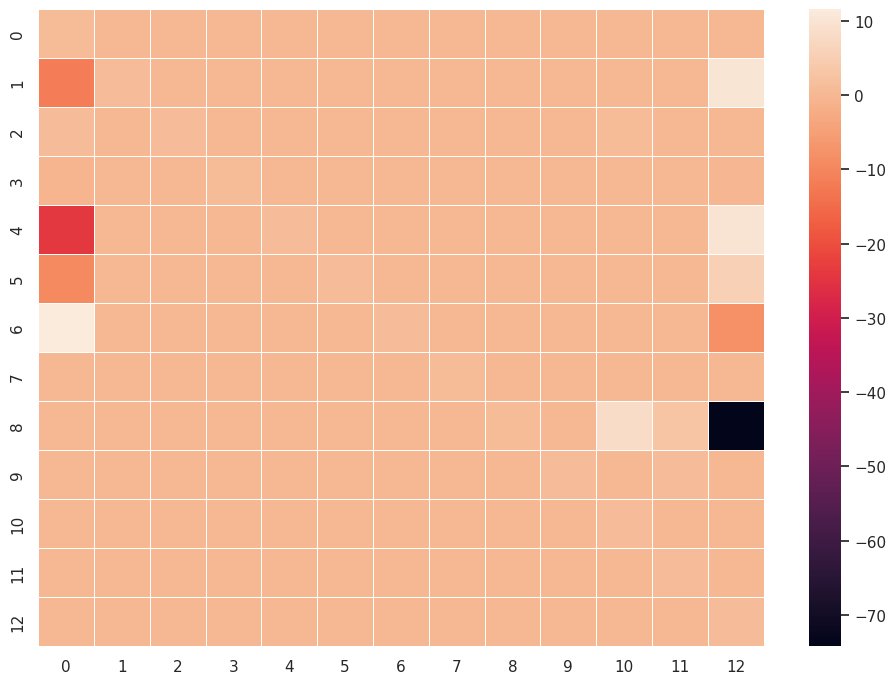

In [165]:
sns.heatmap(coeff_matrix_bn, linewidth = 0.5)

<AxesSubplot: >

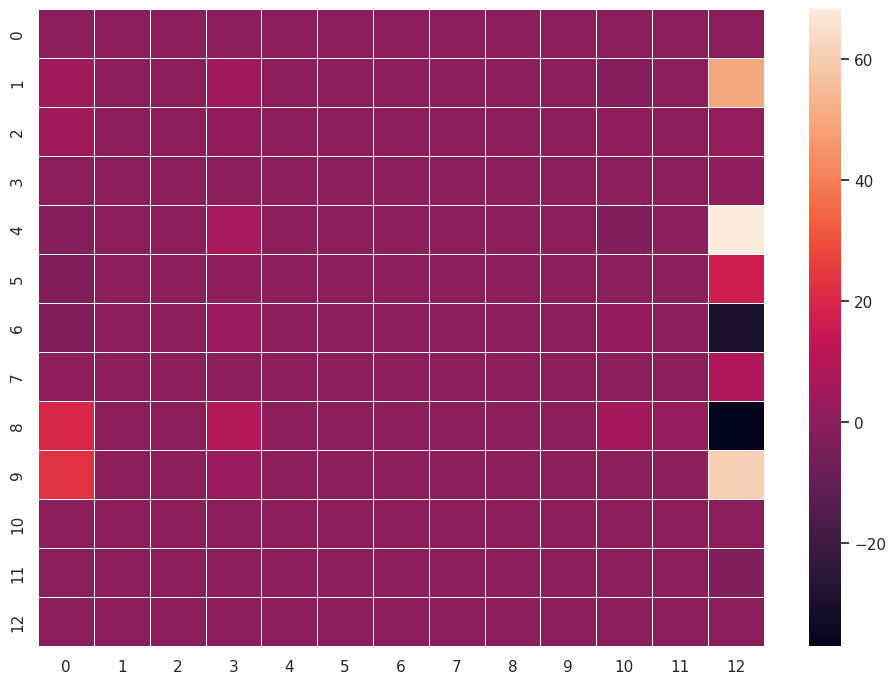

In [164]:
sns.heatmap(coeff_matrix_bn- coeff_matrix_no_mask, linewidth = 0.5)

## Predict 1 step ahead

In [12]:
df_air_w_mask_pred = var_air_w_mask.predict_1_step_ahead_per_col(df_airquality_test)

In [13]:
df_air_wo_mask_pred = var_air_wo_mask.predict_1_step_ahead_per_col(df_airquality_test)

In [14]:
df_air_w_mask_pred.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     0.7        833.0     275.0       2.0          584.0    107.0   
1     1.1        877.0     275.0       2.8          642.0    176.0   
2     1.1        892.0     275.0       3.3          668.0    180.0   
3     1.2        899.0     275.0       3.4          674.0    212.0   
4     2.0       1008.0     275.0       7.1          861.0    331.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  ...  C6H6(GT)_pred  \
0        1144.0     80.0         821.0        463.0  ...       3.390677   
1        1037.0    112.0         859.0        565.0  ...       3.657910   
2        1017.0    121.0         872.0        632.0  ...       4.638767   
3        1002.0    132.0         893.0        691.0  ...       5.037486   
4         839.0    160.0         977.0        943.0  ...       5.067112   

   PT08.S2(NMHC)_pred  NOx(GT)_pred  PT08.S3(NOx)_pred  NO2(GT)_pred  \
0          618.203711    123.027802        1104.384940     88.001867   
1          628.642063    117.084099        1105.905521     84.276678   
2          677.818869    181.364212        1005.910585    111.791814   
3          701.251114    185.336209         987.414472    119.336660   
4          706.896169    216.050847         973.607978    128.201599   

   PT08.S4(NO2)_pred  PT08.S5(O3)_pred     T_pred    RH_pred   AH_pred  
0         843.926102        502.124184  11.375027  31.899150  0.430080  
1         854.654248        477.005414  11.275246  32.387994  0.432464  
2         886.290903        570.485687  10.975903  32.869950  0.432147  
3         897.133902        633.001555  10.277436  34.814994  0.436682  
4         915.337518        692.281387   8.381599  40.558557  0.452989  

[5 rows x 26 columns]

In [16]:
df_air_wo_mask_pred.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     0.7        833.0     275.0       2.0          584.0    107.0   
1     1.1        877.0     275.0       2.8          642.0    176.0   
2     1.1        892.0     275.0       3.3          668.0    180.0   
3     1.2        899.0     275.0       3.4          674.0    212.0   
4     2.0       1008.0     275.0       7.1          861.0    331.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  ...  C6H6(GT)_pred  \
0        1144.0     80.0         821.0        463.0  ...       3.063923   
1        1037.0    112.0         859.0        565.0  ...       3.340539   
2        1017.0    121.0         872.0        632.0  ...       4.233582   
3        1002.0    132.0         893.0        691.0  ...       4.569521   
4         839.0    160.0         977.0        943.0  ...       4.577134   

   PT08.S2(NMHC)_pred  NOx(GT)_pred  PT08.S3(NOx)_pred  NO2(GT)_pred  \
0          614.359348    132.172875        1103.932922     86.848197   
1          627.381427    129.183419        1103.391833     83.221277   
2          682.232616    187.964127        1008.542310    110.989897   
3          702.020900    191.064741         993.796216    118.358576   
4          705.204522    218.288583         982.127943    127.306515   

   PT08.S4(NO2)_pred  PT08.S5(O3)_pred     T_pred    RH_pred   AH_pred  
0         859.549322        546.130520  10.798655  34.001135  0.435142  
1         876.932168        529.762847  10.685609  34.507467  0.438082  
2         913.012119        621.184194  10.457857  34.842119  0.437160  
3         920.860923        677.251061   9.795438  36.771163  0.441626  
4         936.747338        728.078050   8.034103  42.278587  0.456549  

[5 rows x 26 columns]

In [17]:
var_air_w_mask.models['T'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.708e+06
Date:                Wed, 21 Sep 2022   Prob (F-statistic):                        0.00
Time:                        12:58:23   Log-Likelihood:                         -13403.
No. Observations:                7484   AIC:                                  2.681e+04
Df Residuals:                    7483   BIC:                                  2.681e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9978      0.001   1307.015      0.000       0.996       0.999
==============================================================================
Omnibus:                      922.049   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7208.992
Skew:                           0.325   Prob(JB):                         0.00
Kurtosis:                       7.764   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
var_air_wo_mask.models['T'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.413e+05
Date:                Wed, 21 Sep 2022   Prob (F-statistic):                        0.00
Time:                        12:58:41   Log-Likelihood:                         -13125.
No. Observations:                7484   AIC:                                  2.628e+04
Df Residuals:                    7471   BIC:                                  2.637e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2018      0.026     -7.882      0.000      -0.252      -0.152
x2            -0.0019      0.000     -8.960      0.000      -0.002      -0.002
x3             0.0005      0.000      2.586      0.010       0.000       0.001
x4            -0.0709      0.010     -6.885      0.000      -0.091      -0.051
x5          1.925e-05      0.000      0.054      0.957      -0.001       0.001
x6             0.0023      0.000     11.295      0.000       0.002       0.003
x7            -0.0004   9.11e-05     -4.037      0.000      -0.001      -0.000
x8            -0.0039      0.001     -4.712      0.000      -0.006      -0.002
x9             0.0026      0.000     15.521      0.000       0.002       0.003
x10            0.0011      0.000      9.262      0.000       0.001       0.001
x11            0.9473      0.008    126.065      0.000       0.933       0.962
x12           -0.0126      0.003     -4.359      0.000      -0.018      -0.007
x13           -0.1547      0.134     -1.154      0.249      -0.418       0.108
==============================================================================
Omnibus:                     1003.662   Durbin-Watson:                   1.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9388.293
Skew:                           0.319   Prob(JB):                         0.00
Kurtosis:                       8.450   Cond. No.                     2.14e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
def calculate_mse_per_col(df_original,df_pred):
    cols = df_original.columns
    values = []
    for col in cols:
        values.append(mean_squared_error(df_original[col], df_pred[f"{col}_pred"]))
    return values

In [20]:
mse_dict = {}

In [21]:
mse_dict["bn_mask"] = calculate_mse_per_col(df_airquality_test,df_air_w_mask_pred)
mse_dict["no_mask"] = calculate_mse_per_col(df_airquality_test,df_air_wo_mask_pred)

In [22]:
df_mse_air = pd.DataFrame(mse_dict)

In [23]:
df_mse_air["mask-no_mask"] = df_mse_air["bn_mask"] - df_mse_air["no_mask"]

In [24]:
def style_negative(v, props=''):
    return props if v < 0 else None

In [25]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

In [26]:
df_mse_air.style.applymap(style_negative, props='color:red;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None).apply(highlight_max, props='color:white;background-color:darkblue', axis=0)

In [27]:
cols = df_airquality_test.columns

In [28]:
df_air_w_mask_pred = df_air_w_mask_pred.add_suffix("_bn")
df_air_wo_mask_pred = df_air_wo_mask_pred.add_suffix("_no_mask")

In [29]:
df_preds = pd.merge(df_airquality_test,df_air_w_mask_pred[[col for col in df_air_w_mask_pred.columns if col.endswith("_pred_bn")]], left_index = True, right_index = True)

In [30]:
df_preds = pd.merge(df_preds,df_air_wo_mask_pred[[col for col in df_air_wo_mask_pred.columns if col.endswith("_pred_no_mask")]], left_index = True, right_index = True)

In [31]:
df_preds

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0        0.7        833.0     275.0       2.0          584.0    107.0   
1        1.1        877.0     275.0       2.8          642.0    176.0   
2        1.1        892.0     275.0       3.3          668.0    180.0   
3        1.2        899.0     275.0       3.4          674.0    212.0   
4        2.0       1008.0     275.0       7.1          861.0    331.0   
...      ...          ...       ...       ...            ...      ...   
1867     3.1       1314.0     275.0      13.5         1101.0    472.0   
1868     2.4       1163.0     275.0      11.4         1027.0    353.0   
1869     2.4       1142.0     275.0      12.4         1063.0    293.0   
1870     2.1       1003.0     275.0       9.5          961.0    235.0   
1871     2.2       1071.0     275.0      11.9         1047.0    265.0   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  ...  \
0           1144.0     80.0         821.0        463.0  ...   
1           1037.0    112.0         859.0        565.0  ...   
2           1017.0    121.0         872.0        632.0  ...   
3           1002.0    132.0         893.0        691.0  ...   
4            839.0    160.0         977.0        943.0  ...   
...            ...      ...           ...          ...  ...   
1867         539.0    190.0        1374.0       1729.0  ...   
1868         604.0    179.0        1264.0       1269.0  ...   
1869         603.0    175.0        1241.0       1092.0  ...   
1870         702.0    156.0        1041.0        770.0  ...   
1871         654.0    168.0        1129.0        816.0  ...   

      C6H6(GT)_pred_no_mask  PT08.S2(NMHC)_pred_no_mask  NOx(GT)_pred_no_mask  \
0                  3.063923                  614.359348            132.172875   
1                  3.340539                  627.381427            129.183419   
2                  4.233582                  682.232616            187.964127   
3                  4.569521                  702.020900            191.064741   
4                  4.577134                  705.204522            218.288583   
...                     ...                         ...                   ...   
1867              13.716114                 1091.406402            486.453322   
1868              13.684044                 1095.626018            437.013863   
1869              12.118378                 1036.948516            338.056476   
1870              13.021454                 1069.816838            291.203446   
1871              10.645708                  984.092720            247.725924   

      PT08.S3(NOx)_pred_no_mask  NO2(GT)_pred_no_mask  \
0                   1103.932922             86.848197   
1                   1103.391833             83.221277   
2                   1008.542310            110.989897   
3                    993.796216            118.358576   
4                    982.127943            127.306515   
...                         ...                   ...   
1867                 534.221562            177.415792   
1868                 559.121182            178.931069   
1869                 615.370442            170.327009   
1870                 615.123193            168.544155   
1871                 703.205523            153.389862   

      PT08.S4(NO2)_pred_no_mask  PT08.S5(O3)_pred_no_mask  T_pred_no_mask  \
0                    859.549322                546.130520       10.798655   
1                    876.932168                529.762847       10.685609   
2                    913.012119                621.184194       10.457857   
3                    920.860923                677.251061        9.795438   
4                    936.747338                728.078050        8.034103   
...                         ...                       ...             ...   
1867                1371.779632               1514.468753       18.241896   
1868                1376.151043               1634.165019       21.992372   
1869                1

In [32]:
df_preds = df_preds.iloc[1:,:]

In [33]:
cols = df_airquality_test.columns

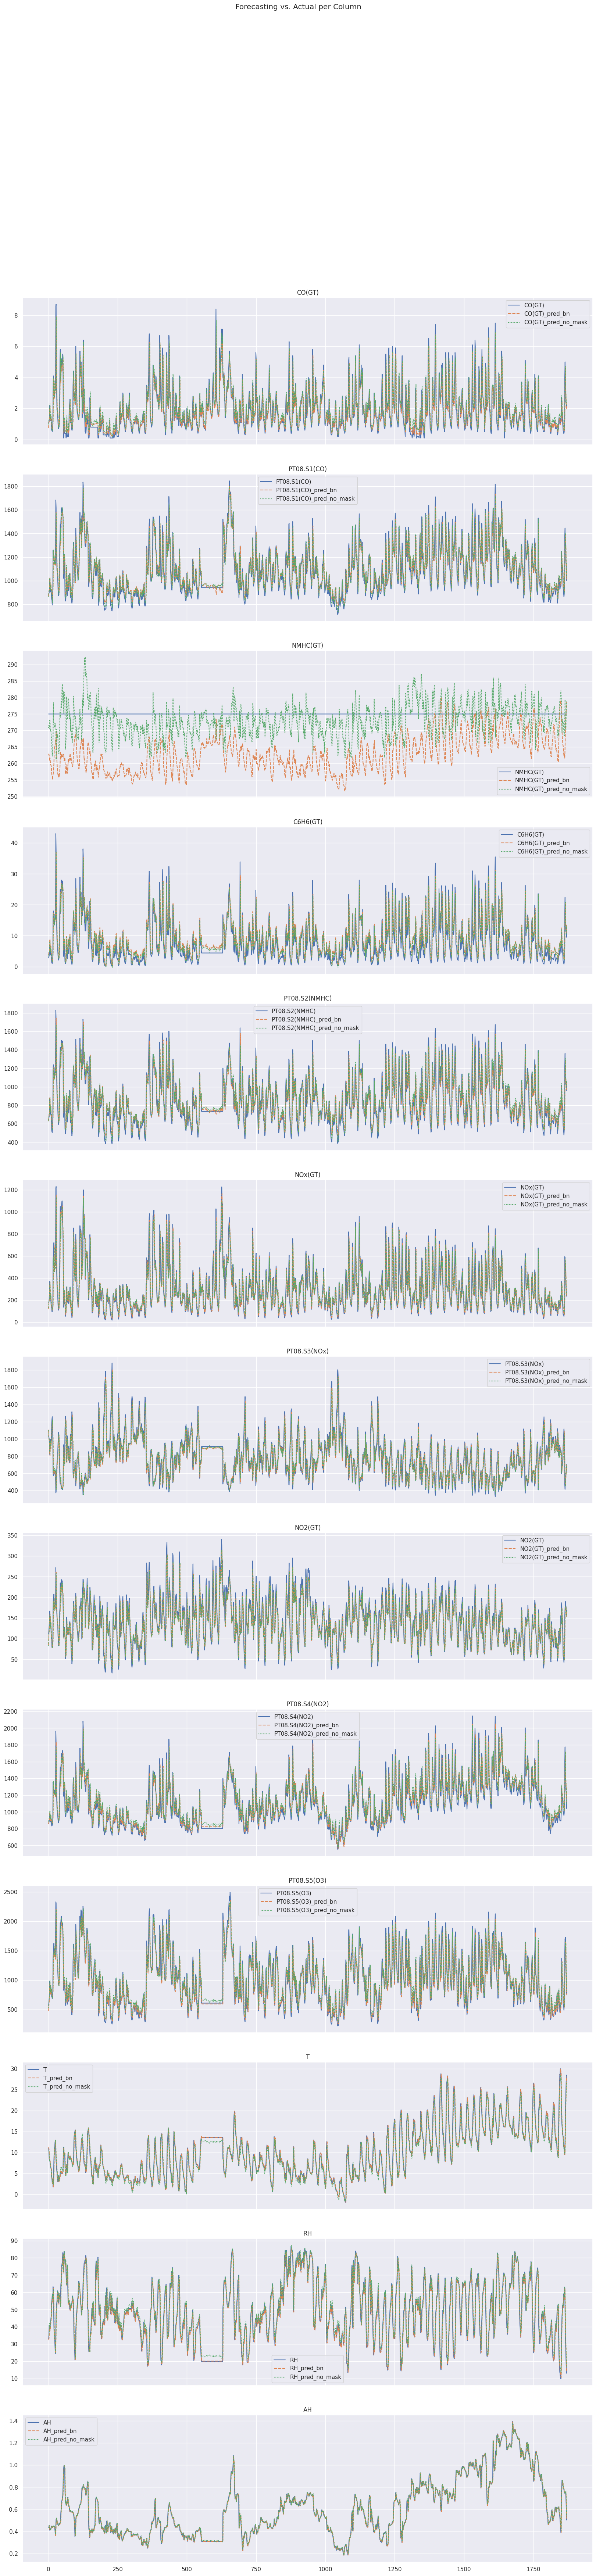

In [34]:
fig, axes = plt.subplots(len(cols), 1, sharex=True, figsize=(20,80))
fig.suptitle('Forecasting vs. Actual per Column')
for i,col in enumerate(cols):
    axes[i].set_title(f"{col}")
    df_lineplot = df_preds[[column for column in df_preds.columns if column.startswith(f"{col}")]].copy()
    sns.lineplot(ax=axes[i],data = df_lineplot  )



In [35]:
col = "AH"

<AxesSubplot: >

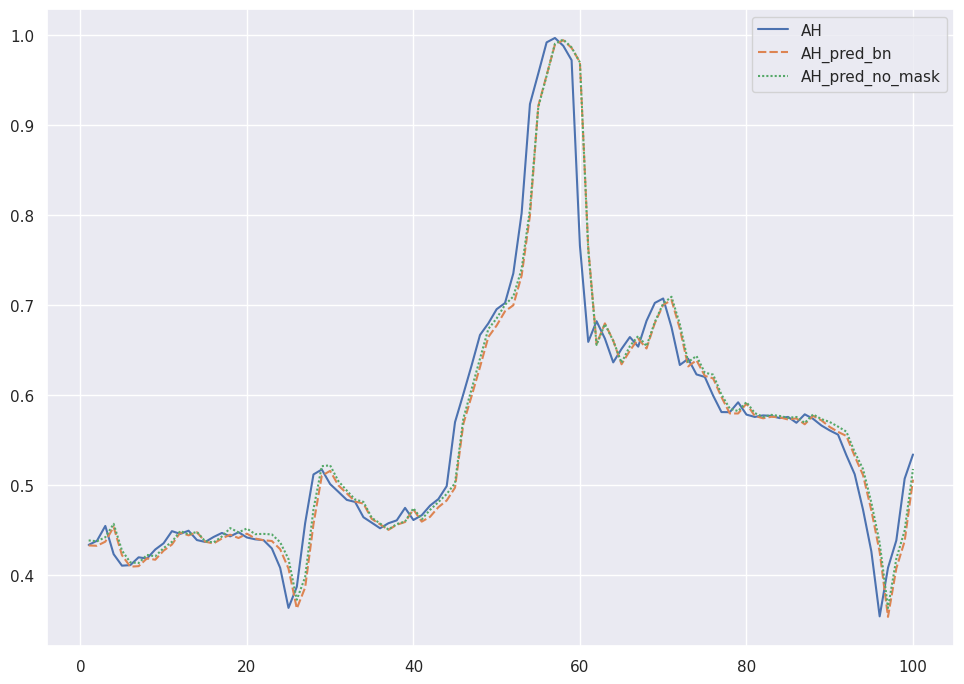

In [36]:
df_lineplot = df_preds[[column for column in df_preds.columns if column.startswith(f"{col}")]].copy()
df_lineplot = df_lineplot.iloc[:100,:]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data = df_lineplot)


In [68]:
number_of_preds = df_airquality_test.shape[0]

In [103]:
df_recursive_preds_no_mask = var_air_wo_mask.recursive_prediction(number_of_preds)


In [104]:

df_recursive_preds_mask = var_air_w_mask.recursive_prediction(number_of_preds)

In [105]:
mse_recursive_dict = {}

In [106]:
df_recursive_preds_mask = df_recursive_preds_mask.add_suffix("_pred")
df_recursive_preds_no_mask = df_recursive_preds_no_mask.add_suffix("_pred")

In [107]:
mse_recursive_dict["bn_mask"] = calculate_mse_per_col(df_airquality_test,df_recursive_preds_mask)
mse_recursive_dict["no_mask"] = calculate_mse_per_col(df_airquality_test,df_recursive_preds_no_mask)

In [108]:
df_mse_recursive_air = pd.DataFrame(mse_recursive_dict)

In [109]:
df_mse_recursive_air["mask-no_mask"] = df_mse_recursive_air["bn_mask"] - df_mse_recursive_air["no_mask"]

In [110]:
df_mse_recursive_air.head()

bn_mask        no_mask  mask-no_mask
0  4.599189e+00       2.050640  2.548549e+00
1  1.614388e+54  131167.791684  1.614388e+54
2  5.962513e+04    6738.428510  5.288670e+04
3  2.129124e+50      41.403177  2.129124e+50
4  5.631127e+06   87063.456141  5.544064e+06

In [111]:
df_mse_recursive_air.style.applymap(style_negative, props='color:red;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None).apply(highlight_max, props='color:white;background-color:darkblue', axis=0)

In [112]:
df_recursive_preds_mask = df_recursive_preds_mask.add_suffix("_bn").reset_index()
df_recursive_preds_no_mask = df_recursive_preds_no_mask.add_suffix("_no_mask").reset_index()

In [113]:
df_preds_recursive = pd.merge(df_airquality_test,
                                df_recursive_preds_mask[[col for col in df_recursive_preds_mask.columns if col.endswith("_pred_bn")]],
                                     left_index = True, right_index = True)

In [114]:
df_preds_recursive = pd.merge(df_preds_recursive,
                    df_recursive_preds_no_mask[[col for col in df_recursive_preds_no_mask.columns if col.endswith("_pred_no_mask")]], 
                    left_index = True, right_index = True)

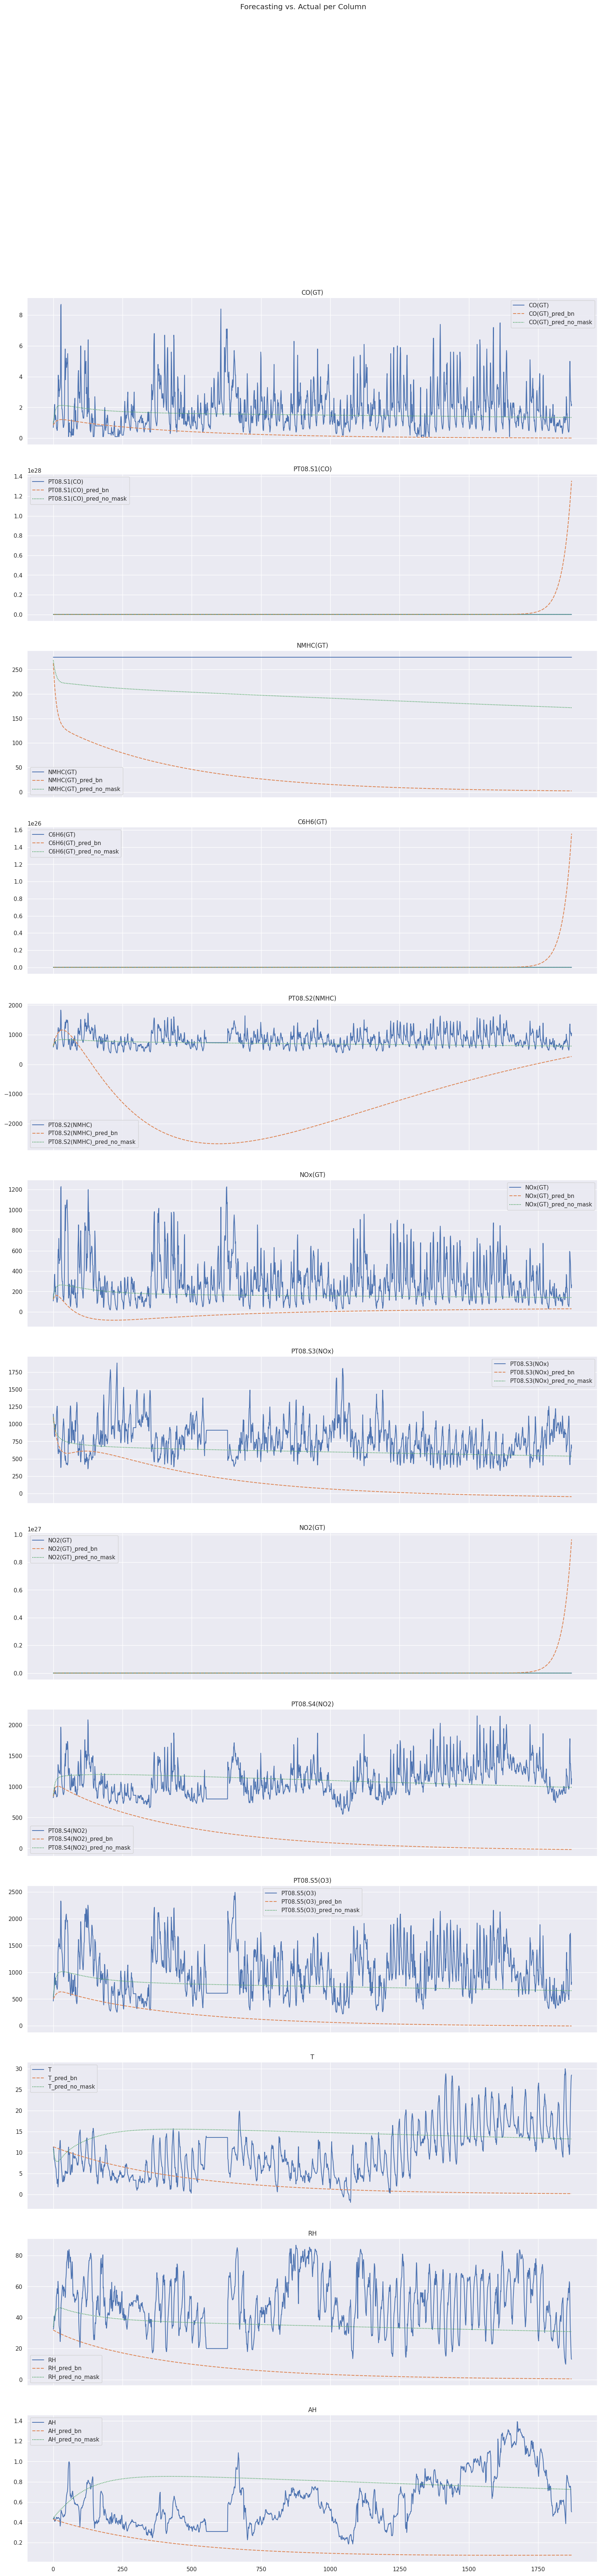

In [115]:
cols = df_airquality_test.columns
fig, axes = plt.subplots(len(cols), 1, sharex=True, figsize=(20,80))
fig.suptitle('Forecasting vs. Actual per Column')
for i,col in enumerate(cols):
    axes[i].set_title(f"{col}")
    df_lineplot = df_preds_recursive[[column for column in df_preds_recursive.columns if column.startswith(f"{col}")]].copy()
    sns.lineplot(ax=axes[i],data = df_lineplot  )



## PRSA Data

In [3]:
with open(r"../data/04_model_bn_output/prsa_bn_shifted_only_lag_matrix.pkl", "rb") as input_file:
    prsa_mask = pickle.load(input_file)

In [16]:
with open(r"../data/04_model_bn_output/prsa_bn_shifted_variable_list.pkl", "rb") as input_file:
    prsa_mask_variable_list = pickle.load(input_file)

In [ ]:
df_prsa_train = pd.read_csv("../data/03_model_input/prsa_train.csv")

In [ ]:
df_prsa_test = pd.read_csv("../data/03_model_input/prsa_test.csv")

In [5]:
df_prsa_shifted_train = pd.read_csv("../data/03_model_input/prsa_shifted_bn_train.csv", sep=" ")

In [ ]:
prsa_mask_variable_list_wo_shifted = [col for col in prsa_mask_variable_list if not col.endswith("_shifted")]

In [ ]:
df_prsa_train = df_prsa_train[prsa_mask_variable_list_wo_shifted] 

In [6]:
df_prsa_shifted_train.head()

pm2.5  DEWP  TEMP    PRES    Iws  Is  Ir  pm2.5_shifted  DEWP_shifted  \
0  98.613215   -21 -12.0  1020.0   4.92   0   0      98.613215         -21.0   
1  98.613215   -21 -11.0  1019.0   6.71   0   0      98.613215         -21.0   
2  98.613215   -21 -14.0  1019.0   9.84   0   0      98.613215         -21.0   
3  98.613215   -20 -12.0  1018.0  12.97   0   0      98.613215         -21.0   
4  98.613215   -19 -10.0  1017.0  16.10   0   0      98.613215         -20.0   

   TEMP_shifted  PRES_shifted  Iws_shifted  Is_shifted  Ir_shifted  
0         -11.0        1021.0         1.79         0.0         0.0  
1         -12.0        1020.0         4.92         0.0         0.0  
2         -11.0        1019.0         6.71         0.0         0.0  
3         -14.0        1019.0         9.84         0.0         0.0  
4         -12.0        1018.0        12.97         0.0         0.0

In [23]:
prsa_mask

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.],
        [1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [22]:
prsa_mask[:3,:3]

matrix([[0., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])

In [28]:
prsa_adj_matrix = prsa_mask[pd.Series(prsa_mask_variable_list).str.endswith("_shifted")][:, ~pd.Series(prsa_mask_variable_list).str.endswith("_shifted")]

<AxesSubplot: >

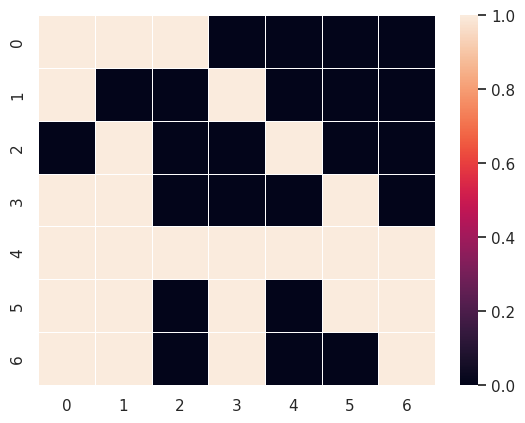

In [31]:
sns.heatmap(prsa_adj_matrix.T, linewidth = 0.5)

In [63]:
np.fill_diagonal(prsa_adj_matrix.T, 1)

In [64]:
prsa_adj_matrix.T

matrix([[1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 0., 1., 0., 0., 0.],
        [0., 1., 1., 0., 1., 0., 0.],
        [1., 1., 0., 1., 0., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 0., 1., 0., 1., 1.],
        [1., 1., 0., 1., 0., 0., 1.]])

In [65]:
var_prsa_w_mask = VAR_bn(df_prsa_train,1,prsa_adj_matrix.T)
var_prsa_w_mask.train_model_per_col()

In [66]:
var_prsa_wo_mask = VAR_bn(df_prsa_train,1)
var_prsa_wo_mask.train_model_per_col()

In [67]:
var_prsa_w_mask.models["DEWP"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          1.367e+06
Date:                Sat, 24 Sep 2022   Prob (F-statistic):                        0.00
Time:                        11:55:31   Log-Likelihood:                         -60130.
No. Observations:               35058   AIC:                                  1.203e+05
Df Residuals:                   35055   BIC:                                  1.203e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9958      0.000   2003.403      0.000       0.995       0.997
x2            -0.0024      0.005     -0.491      0.624      -0.012       0.007
x3             0.0025      0.009      0.266      0.790      -0.016       0.021
==============================================================================
Omnibus:                    10693.569   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           313265.969
Skew:                          -0.861   Prob(JB):                         0.00
Kurtosis:                      17.543   Cond. No.                         18.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
df_prsa_w_mask_pred = var_prsa_w_mask.predict_1_step_ahead_per_col(df_prsa_test)

In [69]:
df_prsa_wo_mask_pred = var_prsa_wo_mask.predict_1_step_ahead_per_col(df_prsa_test)

In [70]:
def calculate_mse_per_col(df_original,df_pred):
    cols = df_original.columns
    values = []
    for col in cols:
        values.append(mean_squared_error(df_original[col], df_pred[f"{col}_pred"]))
    return values

In [71]:
mse_dict = {}

In [72]:
mse_dict["bn_mask"] = calculate_mse_per_col(df_prsa_test,df_prsa_w_mask_pred)
mse_dict["no_mask"] = calculate_mse_per_col(df_prsa_test,df_prsa_wo_mask_pred)

In [73]:
df_mse_prsa = pd.DataFrame(mse_dict)

In [74]:
df_mse_prsa["mask-no_mask"] = df_mse_prsa["bn_mask"] - df_mse_prsa["no_mask"]

In [75]:
def style_negative(v, props=''):
    return props if v < 0 else None

In [76]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

In [77]:
df_mse_prsa.style.applymap(style_negative, props='color:red;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None).apply(highlight_max, props='color:white;background-color:darkblue', axis=0)

##  Learn Airquality shifted

In [4]:
with open(r"../data/04_model_bn_output/airquality_bn_matrix_shifted.pkl", "rb") as input_file:
    air_mask = pickle.load(input_file)

In [5]:
with open(r"../data/04_model_bn_output/airquality_bn_shifted_variable_list.pkl", "rb") as input_file:
    air_mask_variable_list = pickle.load(input_file)

In [7]:
df_air_train = pd.read_csv("../data/03_model_input/air_quality_train.csv")

In [8]:
df_air_test = pd.read_csv("../data/03_model_input/air_quality_test.csv")

In [9]:
df_air_shifted_train = pd.read_csv("../data/03_model_input/air_quality_shifted_bn_train.csv", sep=" ")

In [10]:
air_mask_variable_list_wo_shifted = [col for col in air_mask_variable_list if not col.endswith("_shifted")]

In [11]:
df_air_train = df_air_train[air_mask_variable_list_wo_shifted] 

In [12]:
df_air_train.head()

AH  C6H6(GT)  CO(GT)  NMHC(GT)  NO2(GT)  NOx(GT)  PT08.S1(CO)  \
0  0.7578      11.9     2.6     150.0    113.0    166.0       1360.0   
1  0.7255       9.4     2.0     112.0     92.0    103.0       1292.0   
2  0.7502       9.0     2.2      88.0    114.0    131.0       1402.0   
3  0.7867       9.2     2.2      80.0    122.0    172.0       1376.0   
4  0.7888       6.5     1.6      51.0    116.0    131.0       1272.0   

   PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3)    RH     T  
0         1046.0        1056.0        1692.0       1268.0  48.9  13.6  
1          955.0        1174.0        1559.0        972.0  47.7  13.3  
2          939.0        1140.0        1555.0       1074.0  54.0  11.9  
3          948.0        1092.0        1584.0       1203.0  60.0  11.0  
4          836.0        1205.0        1490.0       1110.0  59.6  11.2

In [13]:
air_mask

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 1., 1., 1., 0., 1., 1., 1., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
         0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
         0., 1., 1., 0., 0., 1., 1., 1., 0., 1.],
        [0., 0.,

In [14]:
air_adj_matrix = air_mask[pd.Series(air_mask_variable_list).str.endswith("_shifted")][:, ~pd.Series(air_mask_variable_list).str.endswith("_shifted")]

<AxesSubplot: >

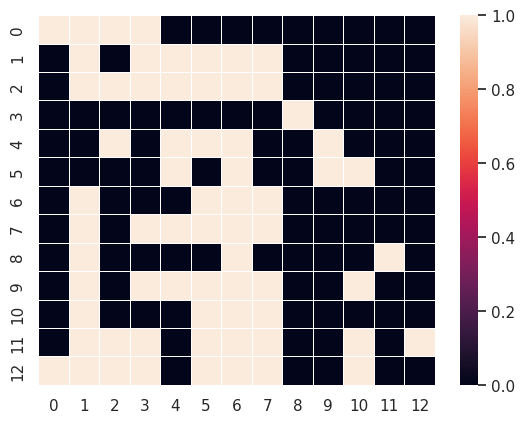

In [15]:
sns.heatmap(air_adj_matrix.T, linewidth = 0.5)

In [16]:
np.fill_diagonal(air_adj_matrix.T, 1)

In [17]:
air_adj_matrix.T

matrix([[1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.],
        [0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
        [0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
        [0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.],
        [0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.],
        [1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.]])

In [19]:
var_air_w_mask = VAR_bn(df_air_train,1,air_adj_matrix.T)
var_air_w_mask.train_model_per_col()

In [20]:
var_air_wo_mask = VAR_bn(df_air_train,1)
var_air_wo_mask.train_model_per_col()

In [21]:
var_air_w_mask.models["NMHC(GT)"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                          1.317e+05
Date:                Sun, 25 Sep 2022   Prob (F-statistic):                        0.00
Time:                        11:19:20   Log-Likelihood:                         -39402.
No. Observations:                7484   AIC:                                  7.881e+04
Df Residuals:                    7482   BIC:                                  7.882e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9191      0.004    217.644      0.000       0.911       0.927
x2             0.0238      0.001     17.663      0.000       0.021       0.026
==============================================================================
Omnibus:                     3735.465   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           823855.404
Skew:                           1.247   Prob(JB):                         0.00
Kurtosis:                      54.340   Cond. No.                         7.45
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
df_air_w_mask_pred = var_air_w_mask.predict_1_step_ahead_per_col(df_air_test)

In [23]:
df_air_wo_mask_pred = var_air_wo_mask.predict_1_step_ahead_per_col(df_air_test)

In [24]:
def calculate_mse_per_col(df_original,df_pred):
    cols = df_original.columns
    values = []
    for col in cols:
        values.append(mean_squared_error(df_original[col], df_pred[f"{col}_pred"]))
    return values

In [25]:
mse_dict = {}

In [26]:
mse_dict["bn_mask"] = calculate_mse_per_col(df_air_test,df_air_w_mask_pred)
mse_dict["no_mask"] = calculate_mse_per_col(df_air_test,df_air_wo_mask_pred)

In [27]:
df_mse_air = pd.DataFrame(mse_dict)

In [28]:
df_mse_air["mask-no_mask"] = df_mse_air["bn_mask"] - df_mse_air["no_mask"]

In [29]:
def style_negative(v, props=''):
    return props if v < 0 else None

In [30]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

In [31]:
df_mse_air.style.applymap(style_negative, props='color:red;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None).apply(highlight_max, props='color:white;background-color:darkblue', axis=0)